# Classification Methods using Telco-Customer-Churn Dataset

#### *WA_Fn-UseC_-Telco-Customer-Churn.csv* dataset

#  Evaluate the following classification models:
    a.       Logistic Regression
    b.       Support Vector Machine
    c.       K Nearest Neighbors
    d.       Decision Trees
    e.       Random Forests
Note that you need to decide the choice of hyper-parameters for the models, such as the value of k for k nearest neighbor method and the maximum depth for the random forest method.


The dataset and its description is available at Kaggle. The goal of this task is to analyze the behavior of telecom customers and understand what factors are important to retain customers.

### 1.       Visualize the univariate distribution of each input variable and the target variable “churn”.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('max_columns',None)

In [2]:
telco = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

telco

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
telco.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

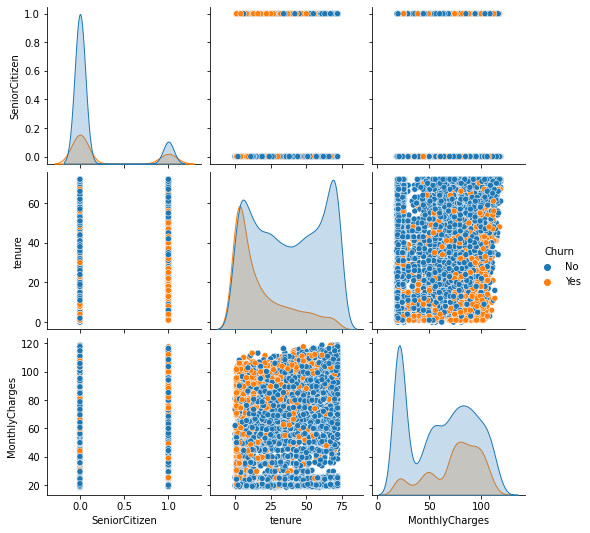

In [4]:
sns.pairplot(telco, hue='Churn')

<AxesSubplot:xlabel='gender', ylabel='count'>

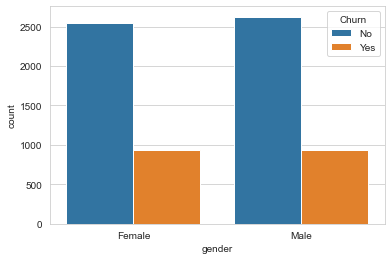

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='gender',hue='Churn',data=telco)

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

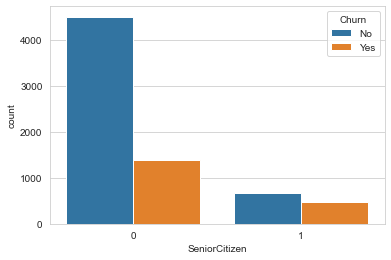

In [6]:
sns.countplot(x='SeniorCitizen',hue='Churn',data=telco)

<ipython-input-7-c4ad7382cc42>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


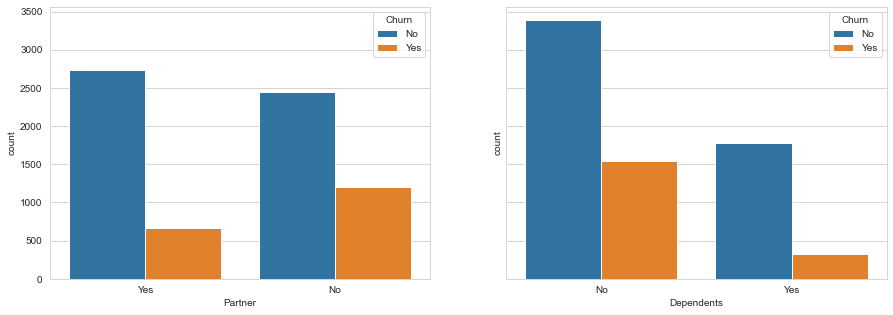

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.countplot(x = 'Partner', ax=ax[0],data=telco, hue='Churn')
sns.countplot(x = 'Dependents', ax=ax[1], data=telco,hue='Churn')
fig.show()

(<Figure size 1080x360 with 1 Axes>,
 <AxesSubplot:xlabel='tenure', ylabel='count'>)

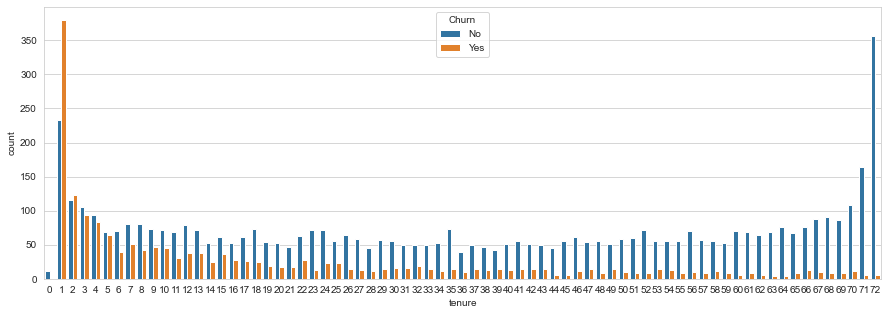

In [8]:
fig  =plt.subplots(figsize=(15, 5))
sns.set_style('whitegrid')
sns.countplot(x='tenure',hue='Churn',data=telco)
fig

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

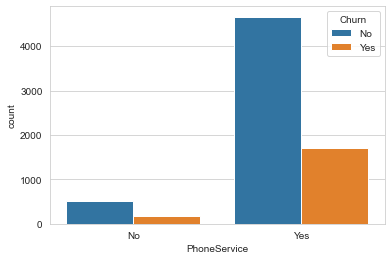

In [9]:
sns.countplot(x = 'PhoneService', data=telco, hue='Churn')

<AxesSubplot:xlabel='InternetService', ylabel='count'>

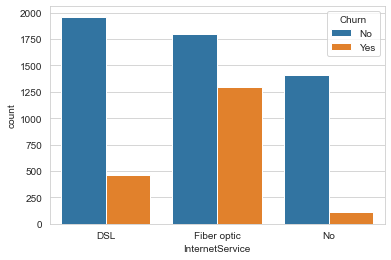

In [10]:
sns.countplot(x = 'InternetService',  data=telco,hue='Churn')

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

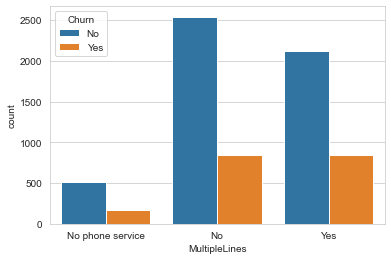

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='MultipleLines',hue='Churn',data=telco)

<ipython-input-12-d86d206f54f4>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


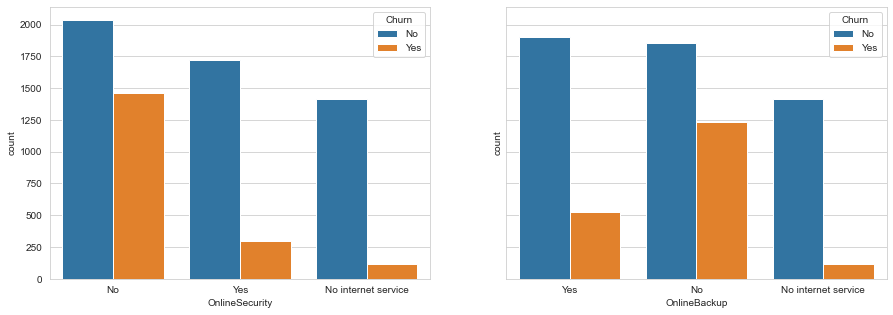

In [12]:
fig, ax =plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.countplot(x = 'OnlineSecurity', ax=ax[0],data=telco, hue='Churn')
sns.countplot(x = 'OnlineBackup', ax=ax[1], data=telco,hue='Churn')
fig.show()

<ipython-input-13-f96821ad3fbf>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


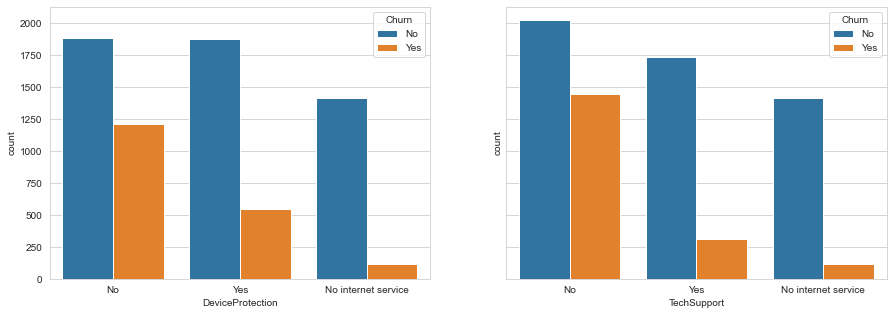

In [13]:
fig, ax =plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.countplot(x = 'DeviceProtection', ax=ax[0],data=telco, hue='Churn')
sns.countplot(x = 'TechSupport', ax=ax[1], data=telco,hue='Churn')
fig.show()

<ipython-input-14-5c57b91c335f>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


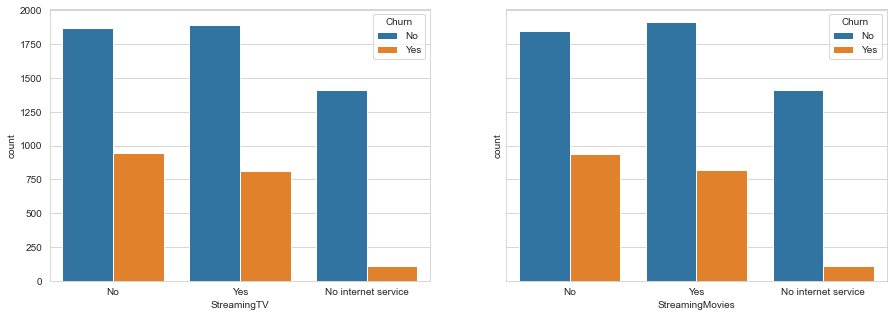

In [14]:
fig, ax =plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.countplot(x = 'StreamingTV', ax=ax[0],data=telco, hue='Churn')
sns.countplot(x = 'StreamingMovies', ax=ax[1], data=telco,hue='Churn')
fig.show()

<AxesSubplot:xlabel='Contract', ylabel='count'>

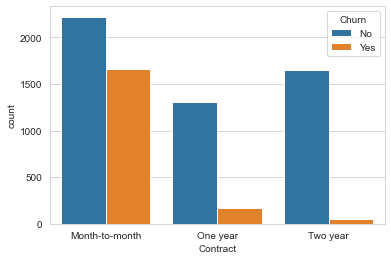

In [15]:
sns.countplot(x='Contract',hue='Churn',data=telco)

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

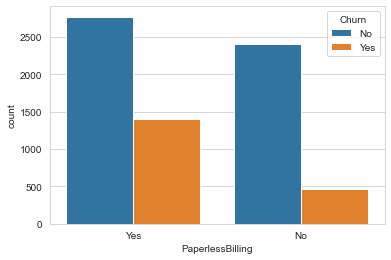

In [16]:
sns.countplot(x='PaperlessBilling',hue='Churn',data=telco)

(<Figure size 1080x360 with 1 Axes>,
 <AxesSubplot:xlabel='PaymentMethod', ylabel='count'>)

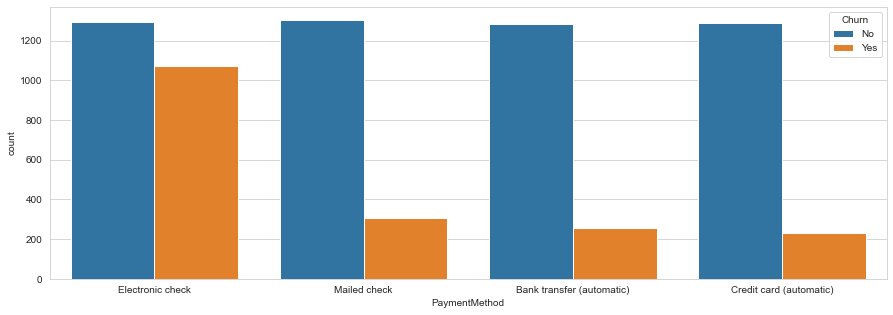

In [17]:
fig  =plt.subplots(figsize=(15, 5))
sns.countplot(x='PaymentMethod',hue='Churn',data=telco)
fig

(<Figure size 720x720 with 1 Axes>,
 <AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>)

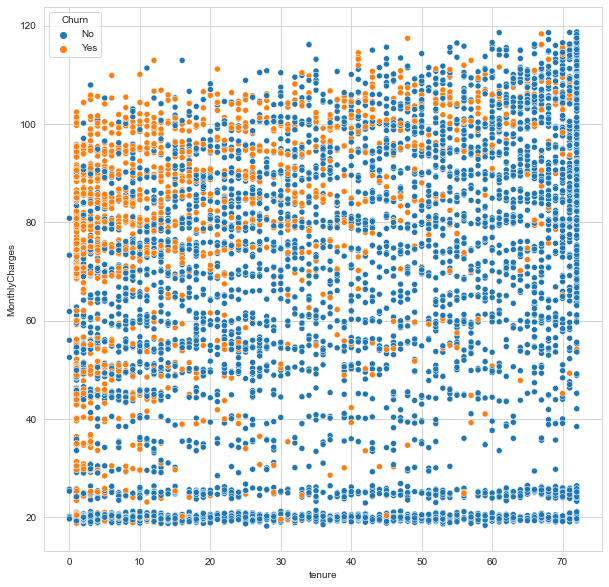

In [18]:
fig = plt.subplots(figsize=(10, 10))
sns.scatterplot(x = 'tenure', y='MonthlyCharges',data=telco, hue='Churn')
fig

(<Figure size 720x720 with 1 Axes>,
 <AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>)

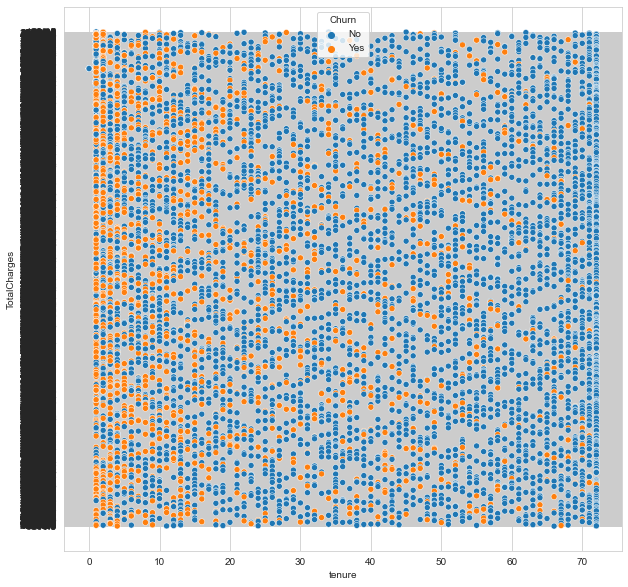

In [19]:
fig = plt.subplots(figsize=(10, 10))
sns.scatterplot(x = 'tenure', y='TotalCharges',data=telco, hue='Churn')
fig

### 2.       Split data into training and test sets. Convert each categorical variable into numerical variables using one-hot-encoding.

                Example of one-hot encoding:
                Gender: Male -> (1, 0), Female -> (0, 1)
                Ethnicity: 1. Caucasian, 2. African American, 3. Hispanic, 4. Asian, 5 Native American, 6 Pacific Islander
                One-hot encoded labels: 1 → (1, 0, 0, 0, 0, 0)
                                        2 → (0, 1, 0, 0, 0, 0)
                                        6 → (0, 0, 0, 0, 0, 1)


In [20]:
telco3 = pd.concat([pd.to_numeric(telco['TotalCharges'], errors='coerce').fillna(0), pd.get_dummies(telco.drop(['customerID', 'TotalCharges'], axis=1))], axis=1)

telco3

,TotalCharges,SeniorCitizen,tenure,MonthlyCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,29.85,0,1,29.85,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
1,1889.50,0,34,56.95,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0
2,108.15,0,2,53.85,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
3,1840.75,0,45,42.30,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0
4,151.65,0,2,70.70,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1990.50,0,24,84.80,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0
7039,7362.90,0,72,103.20,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0
7040,346.45,0,11,29.60,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
7041,306.60,1,4,74.40,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1


In [21]:
telco3.isnull().any()

TotalCharges                               False
SeniorCitizen                              False
tenure                                     False
MonthlyCharges                             False
gender_Female                              False
gender_Male                                False
Partner_No                                 False
Partner_Yes                                False
Dependents_No                              False
Dependents_Yes                             False
PhoneService_No                            False
PhoneService_Yes                           False
MultipleLines_No                           False
MultipleLines_No phone service             False
MultipleLines_Yes                          False
InternetService_DSL                        False
InternetService_Fiber optic                False
InternetService_No                         False
OnlineSecurity_No                          False
OnlineSecurity_No internet service         False
OnlineSecurity_Yes  

In [22]:
telco3

,TotalCharges,SeniorCitizen,tenure,MonthlyCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,29.85,0,1,29.85,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
1,1889.50,0,34,56.95,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0
2,108.15,0,2,53.85,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
3,1840.75,0,45,42.30,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0
4,151.65,0,2,70.70,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1990.50,0,24,84.80,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0
7039,7362.90,0,72,103.20,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0
7040,346.45,0,11,29.60,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
7041,306.60,1,4,74.40,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1


In [23]:
from sklearn.model_selection import train_test_split
telco_train, telco_test = train_test_split(telco3, test_size=0.2)

<AxesSubplot:>

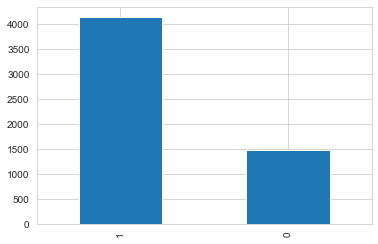

In [24]:
telco_train['Churn_No'].value_counts().plot.bar()

<AxesSubplot:>

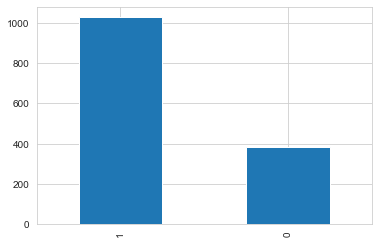

In [25]:
telco_test['Churn_No'].value_counts().plot.bar()

## a. Logistic Regression

In [26]:
telco_train = telco_train.apply(pd.to_numeric, errors='ignore')

In [27]:
telco_train_rm = telco_train.drop(['Churn_Yes', 'Churn_No'], axis=1)
telco_train_rm = telco_train_rm.apply(pd.to_numeric, errors='ignore')

In [28]:
# Increase max_iterr from default 100 to 300 to ConvergenceWarning error

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=300)
model.fit(telco_train_rm, telco_train['Churn_No'])

LogisticRegression(max_iter=300)

In [29]:
#Test Accuracy
from sklearn.metrics import accuracy_score

test_predictions = model.predict(telco_test.iloc[:, :45])

accuracy_score(telco_test['Churn_No'], test_predictions)

0.8232789212207239

###     Logistic Regression: Cross Validation

In [30]:
#Cross Validation
from sklearn.model_selection import cross_val_score

print(cross_val_score(model, telco_train_rm, telco_train['Churn_No'], cv=3))

[0.7971246  0.80085197 0.79499468]


In [31]:
#Confusion Matrix(True Positive,True Negative,False Positive, False Negative)
from sklearn.metrics import confusion_matrix

confusion_matrix(telco_test['Churn_No'], test_predictions)

array([[220, 161],
       [ 88, 940]], dtype=int64)

In [32]:
#Precision, Recall, F1 Classification Report
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(classification_report(telco_test['Churn_No'], test_predictions))
print(accuracy_score(telco_test['Churn_No'], test_predictions))

              precision    recall  f1-score   support

           0       0.71      0.58      0.64       381
           1       0.85      0.91      0.88      1028

    accuracy                           0.82      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409

0.8232789212207239


### Logistic Regression Results:
- Accuracy = 0.80
- Precision = 0.83
- Recall = 0.91
- F1 Score = 0.87


## b. Support Vector Machine

### Support Vector Machine: Linear

In [33]:
from sklearn import svm
model = svm.SVC(kernel='linear', C=1)
model.fit(telco_train_rm.iloc[: , 1:], telco_train['Churn_No'])

SVC(C=1, kernel='linear')

In [34]:
test_predictions = model.predict(telco_test.iloc[:, 1:45])

In [35]:
accuracy_score(telco_test['Churn_No'], test_predictions)

0.8147622427253371

In [36]:
#Confusion Matrix(True Positive,True Negative,False Positive, False Negative)
from sklearn.metrics import confusion_matrix

confusion_matrix(telco_test['Churn_No'], test_predictions)

array([[215, 166],
       [ 95, 933]], dtype=int64)

In [37]:
print(classification_report(telco_test['Churn_No'], test_predictions))
print(accuracy_score(telco_test['Churn_No'], test_predictions))

              precision    recall  f1-score   support

           0       0.69      0.56      0.62       381
           1       0.85      0.91      0.88      1028

    accuracy                           0.81      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.81      0.81      1409

0.8147622427253371


### Support Vector Machine: Radial Basis Function (RBF)

In [38]:
model = svm.SVC(kernel='rbf', C=1)
model.fit(telco_train_rm.iloc[: , 1:], telco_train['Churn_No'])

SVC(C=1)

In [39]:
test_predictions = model.predict(telco_test.iloc[:, 1:45])

In [40]:
#Confusion Matrix(True Positive,True Negative,False Positive, False Negative)
from sklearn.metrics import confusion_matrix

confusion_matrix(telco_test['Churn_No'], test_predictions)

array([[162, 219],
       [ 61, 967]], dtype=int64)

In [41]:
print(classification_report(telco_test['Churn_No'], test_predictions))
print(accuracy_score(telco_test['Churn_No'], test_predictions))

              precision    recall  f1-score   support

           0       0.73      0.43      0.54       381
           1       0.82      0.94      0.87      1028

    accuracy                           0.80      1409
   macro avg       0.77      0.68      0.70      1409
weighted avg       0.79      0.80      0.78      1409

0.801277501774308


### Support Vector Machine Results:
#### Linear
- Accuracy = 0.80
- Precision = 0.83
- Recall = 0.90
- F1 Score = 0.87

#### RBF
- Accuracy = 0.79
- Precision = 0.80
- Recall = 0.93
- F1 Score = 0.86

## c. K Nearest Neighbor

In [42]:
from sklearn.neighbors import KNeighborsClassifier
model_3nn_1 = KNeighborsClassifier(n_neighbors=1)
model_3nn_1.fit(telco_train_rm, telco_train['Churn_No'])

KNeighborsClassifier(n_neighbors=1)

In [43]:
test_predictions1 = model_3nn_1.predict(telco_test.iloc[:, :45])

In [44]:
model_3nn_2 = KNeighborsClassifier(n_neighbors=5)
model_3nn_2.fit(telco_train_rm, telco_train['Churn_No'])

KNeighborsClassifier()

In [45]:
test_predictions2 = model_3nn_2.predict(telco_test.iloc[:, :45])

In [46]:
model_3nn_3 = KNeighborsClassifier(n_neighbors=25)
model_3nn_3.fit(telco_train_rm, telco_train['Churn_No'])

KNeighborsClassifier(n_neighbors=25)

In [47]:
test_predictions3 = model_3nn_3.predict(telco_test.iloc[:, :45])

#### K Nearest Neighbor: K=1

In [48]:
print("K Nearest Neighbors: K=1")
print(classification_report(telco_test['Churn_No'], test_predictions1))
print(accuracy_score(telco_test['Churn_No'], test_predictions1))

K Nearest Neighbors: K=1
              precision    recall  f1-score   support

           0       0.49      0.46      0.47       381
           1       0.80      0.82      0.81      1028

    accuracy                           0.72      1409
   macro avg       0.65      0.64      0.64      1409
weighted avg       0.72      0.72      0.72      1409

0.7224982256919801


#### K Nearest Neighbor: K=5

In [49]:
print("K Nearest Neighbors: K=5")
print(classification_report(telco_test['Churn_No'], test_predictions2))
print(accuracy_score(telco_test['Churn_No'], test_predictions2))

K Nearest Neighbors: K=5
              precision    recall  f1-score   support

           0       0.59      0.46      0.51       381
           1       0.81      0.88      0.85      1028

    accuracy                           0.77      1409
   macro avg       0.70      0.67      0.68      1409
weighted avg       0.75      0.77      0.76      1409

0.765791341376863


#### K Nearest Neighbor: K=25

In [50]:
print("K Nearest Neighbors: K=25")
print(classification_report(telco_test['Churn_No'], test_predictions3))
print(accuracy_score(telco_test['Churn_No'], test_predictions3))

K Nearest Neighbors: K=25
              precision    recall  f1-score   support

           0       0.68      0.39      0.50       381
           1       0.81      0.93      0.86      1028

    accuracy                           0.79      1409
   macro avg       0.75      0.66      0.68      1409
weighted avg       0.77      0.79      0.77      1409

0.78708303761533


### K Nearest Neighbor Results:
#### K=1
- Accuracy = 0.72
- Precision = 0.80
- Recall = 0.82
- F1 Score = 0.81

#### K=5
- Accuracy = 0.78
- Precision = 0.81
- Recall = 0.90
- F1 Score = 0.85

#### K=25
- Accuracy = 0.78
- Precision = 0.80
- Recall = 0.94
- F1 Score = 0.86

## d. Decision Trees

In [51]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(max_depth=5, random_state=30)
model1.fit(telco_train_rm, telco_train['Churn_No'])

DecisionTreeClassifier(max_depth=5, random_state=30)

In [52]:
test_predictions1 = model1.predict(telco_test.iloc[:, :45])

In [53]:
model2 = DecisionTreeClassifier(max_depth=4, random_state=30)
model2.fit(telco_train_rm, telco_train['Churn_No'])

DecisionTreeClassifier(max_depth=4, random_state=30)

In [54]:
test_predictions2 = model2.predict(telco_test.iloc[:, :45])

In [55]:
model3 = DecisionTreeClassifier(max_depth=2, random_state=30)
model3.fit(telco_train_rm, telco_train['Churn_No'])

DecisionTreeClassifier(max_depth=2, random_state=30)

In [56]:
test_predictions3 = model3.predict(telco_test.iloc[:, :45])

#### Decision Tree: Max Depth = 5

In [57]:
print("Decision Tree: Depth = 5")
print(confusion_matrix(telco_test['Churn_No'], test_predictions1))
print(classification_report(telco_test['Churn_No'], test_predictions1))
print(accuracy_score(telco_test['Churn_No'], test_predictions1))

Decision Tree: Depth = 5
[[235 146]
 [119 909]]
              precision    recall  f1-score   support

           0       0.66      0.62      0.64       381
           1       0.86      0.88      0.87      1028

    accuracy                           0.81      1409
   macro avg       0.76      0.75      0.76      1409
weighted avg       0.81      0.81      0.81      1409

0.8119233498935415


#### Decision Tree: Max Depth = 4

In [58]:
print("Decision Tree: Depth = 4")
print(confusion_matrix(telco_test['Churn_No'], test_predictions2))
print(classification_report(telco_test['Churn_No'], test_predictions2))
print(accuracy_score(telco_test['Churn_No'], test_predictions2))

Decision Tree: Depth = 4
[[173 208]
 [ 73 955]]
              precision    recall  f1-score   support

           0       0.70      0.45      0.55       381
           1       0.82      0.93      0.87      1028

    accuracy                           0.80      1409
   macro avg       0.76      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409

0.8005677785663591


#### Decision Tree: Max Depth = 2

In [59]:
print("Decision Tree: Depth = 2")
print(confusion_matrix(telco_test['Churn_No'], test_predictions3))
print(classification_report(telco_test['Churn_No'], test_predictions3))
print(accuracy_score(telco_test['Churn_No'], test_predictions3))

Decision Tree: Depth = 2
[[238 143]
 [172 856]]
              precision    recall  f1-score   support

           0       0.58      0.62      0.60       381
           1       0.86      0.83      0.84      1028

    accuracy                           0.78      1409
   macro avg       0.72      0.73      0.72      1409
weighted avg       0.78      0.78      0.78      1409

0.7764371894960965


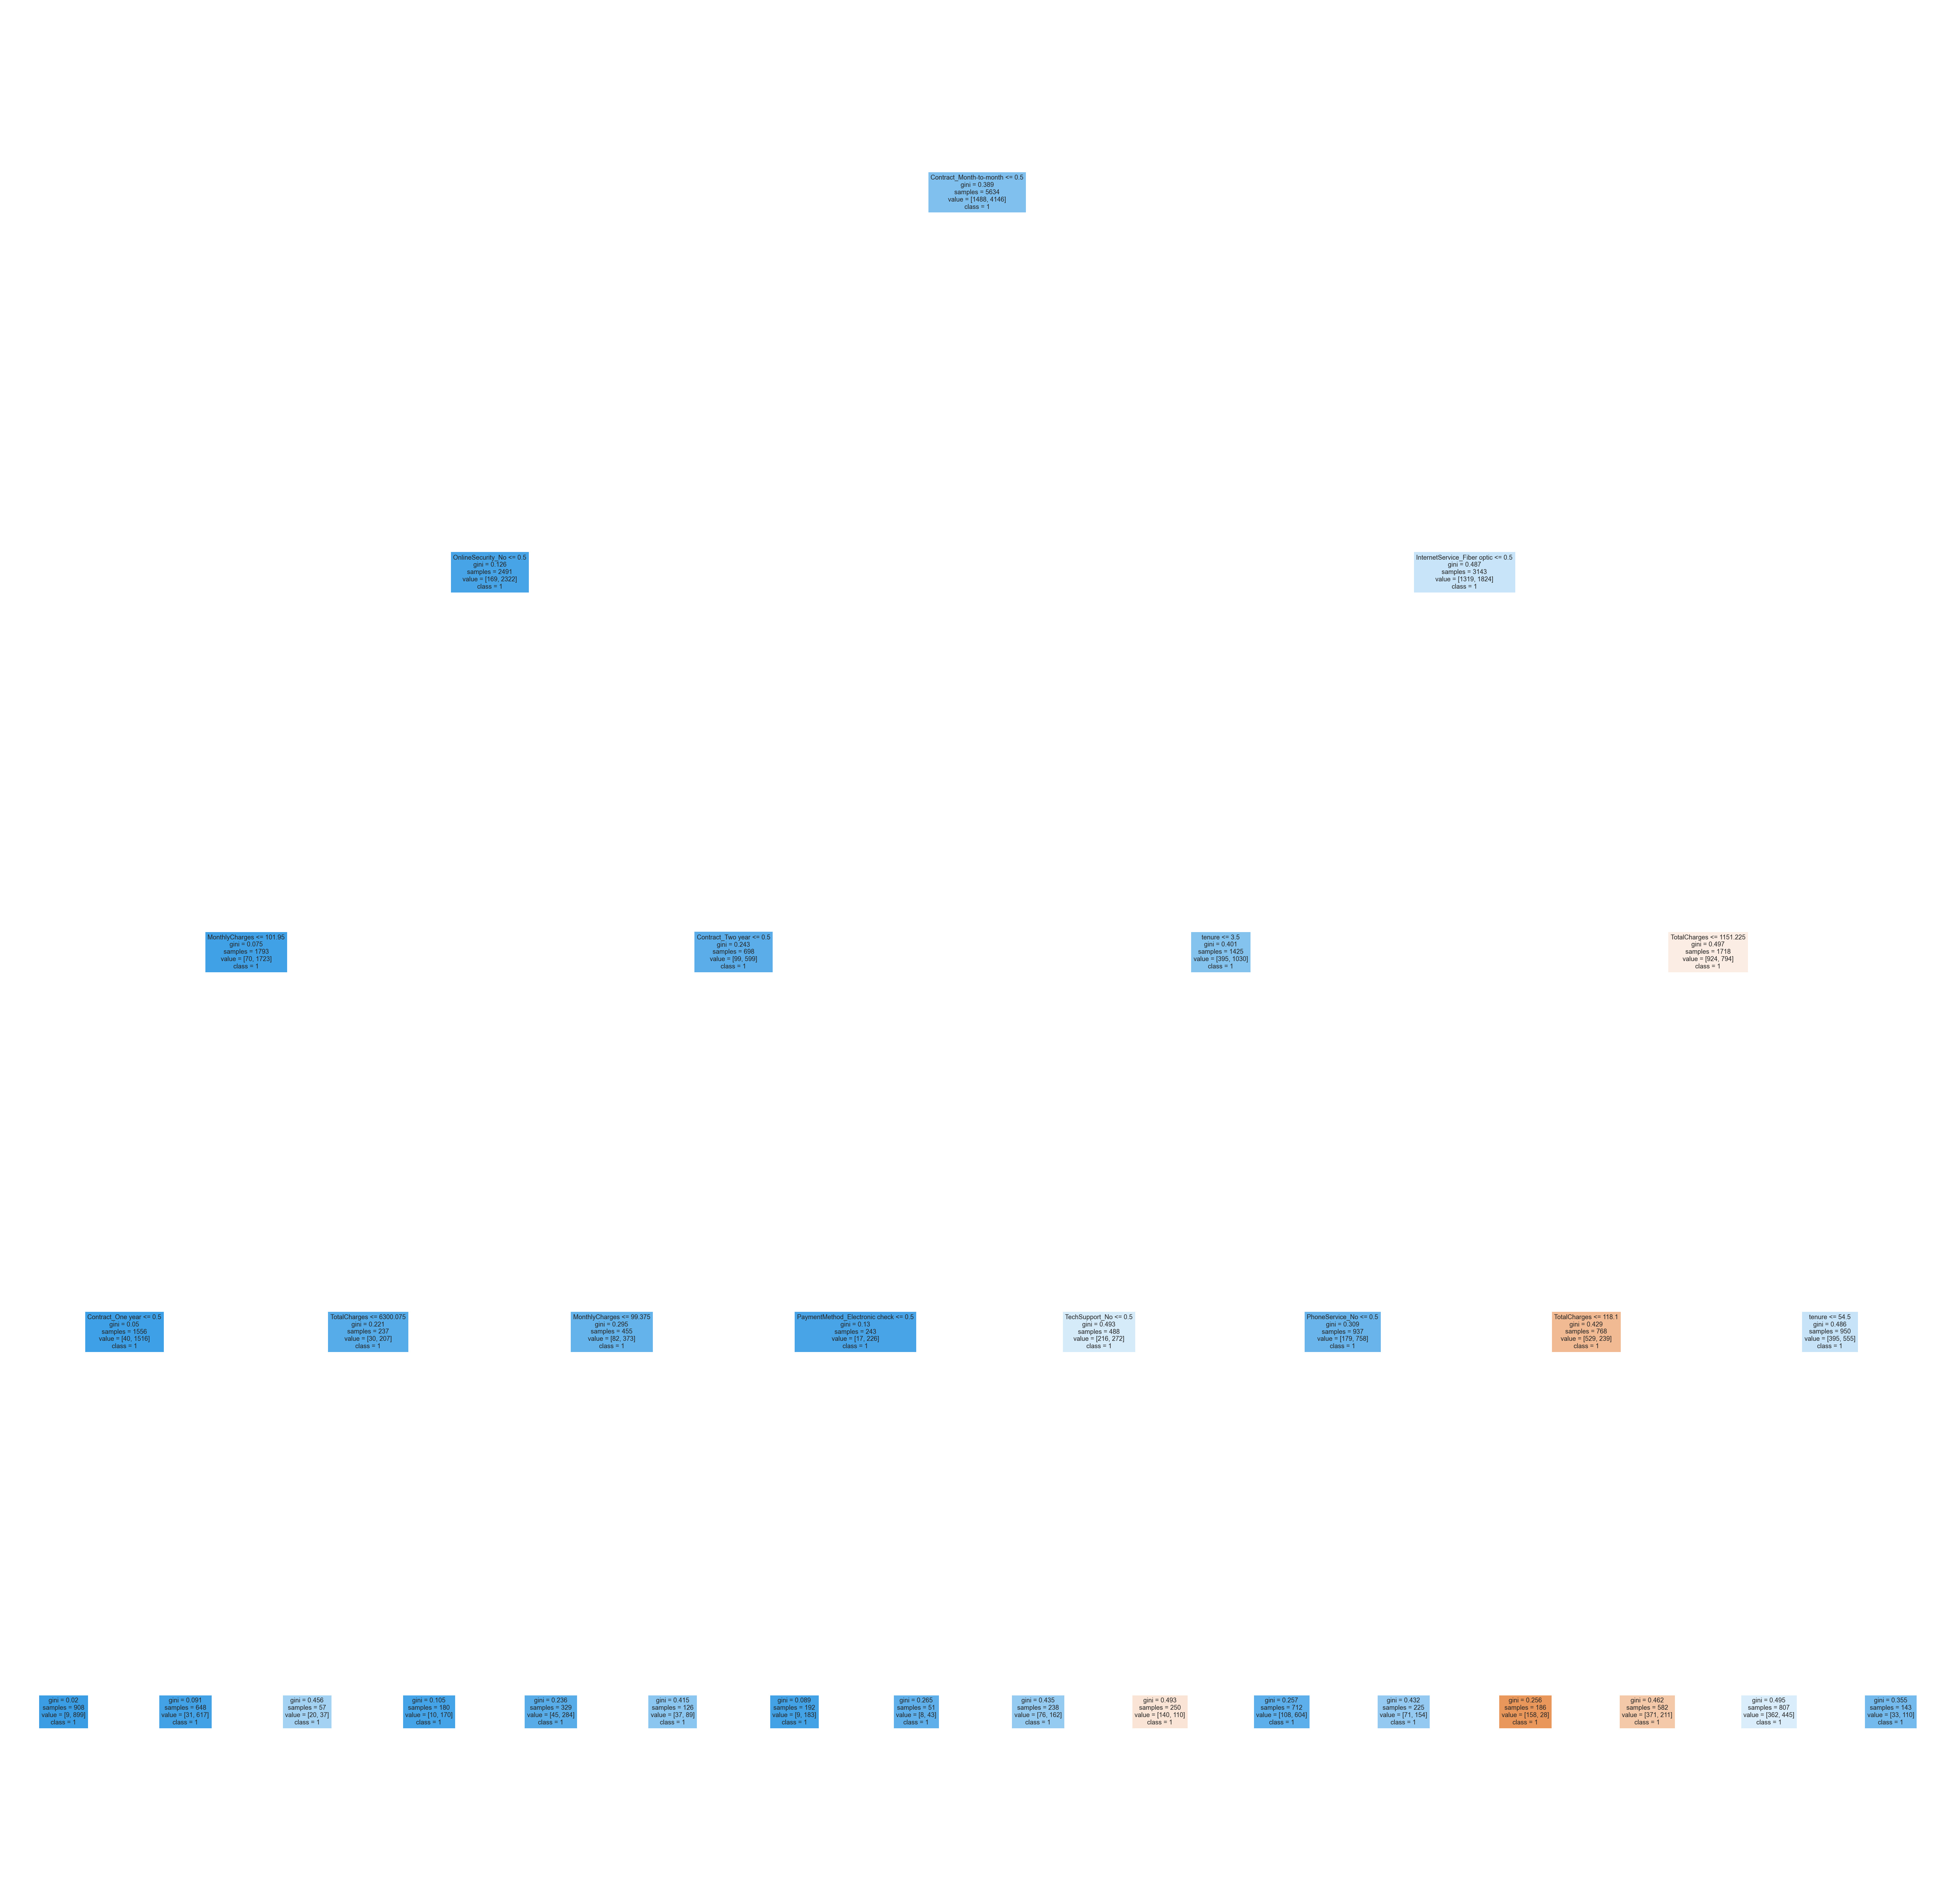

In [60]:
from sklearn.tree import plot_tree

plt.figure(figsize=(100,100))
plot_tree(model2, feature_names = telco_test.columns, filled=True, class_names = telco3.Churn_No.astype(str))
plt.show()

### Decision Tree Results:
#### Max Depth = 5
- Accuracy = 0.79
- Precision = 0.82
- Recall = 0.90
- F1 Score = 0.86

#### Max Depth = 4
- Accuracy = 0.80
- Precision = 0.82
- Recall = 0.91
- F1 Score = 0.86

#### Max Depth = 2
- Accuracy = 0.75
- Precision = 0.84
- Recall = 0.80
- F1 Score = 0.82

## e. Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier(n_estimators=100, max_depth=10)
model1.fit(telco_train_rm, telco_train['Churn_No'])

RandomForestClassifier(max_depth=10)

In [62]:
test_predictions1 = model1.predict(telco_test.iloc[:, :45])

In [63]:
model2 = RandomForestClassifier(n_estimators=100, max_depth=5)
model2.fit(telco_train_rm, telco_train['Churn_No'])

RandomForestClassifier(max_depth=5)

In [64]:
test_predictions2 = model2.predict(telco_test.iloc[:, :45])

In [65]:
model3 = RandomForestClassifier(n_estimators=100, max_depth=2)
model3.fit(telco_train_rm, telco_train['Churn_No'])

RandomForestClassifier(max_depth=2)

In [66]:
test_predictions3 = model3.predict(telco_test.iloc[:, :45])

#### Random Forest: Max Depth = 10

In [67]:
print("Random Forest: Depth = 10")
print(confusion_matrix(telco_test['Churn_No'], test_predictions1))
print(classification_report(telco_test['Churn_No'], test_predictions1))
print(accuracy_score(telco_test['Churn_No'], test_predictions1))

Random Forest: Depth = 10
[[206 175]
 [ 86 942]]
              precision    recall  f1-score   support

           0       0.71      0.54      0.61       381
           1       0.84      0.92      0.88      1028

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.81      0.81      1409

0.8147622427253371


#### Random Forest: Max Depth= 5

In [68]:
print("Random Forest: Depth = 5")
print(confusion_matrix(telco_test['Churn_No'], test_predictions2))
print(classification_report(telco_test['Churn_No'], test_predictions2))
print(accuracy_score(telco_test['Churn_No'], test_predictions2))

Random Forest: Depth = 5
[[171 210]
 [ 51 977]]
              precision    recall  f1-score   support

           0       0.77      0.45      0.57       381
           1       0.82      0.95      0.88      1028

    accuracy                           0.81      1409
   macro avg       0.80      0.70      0.72      1409
weighted avg       0.81      0.81      0.80      1409

0.8147622427253371


#### Random Forest: Max Depth = 2

In [69]:
print("Decision Tree: Depth = 2")
print(confusion_matrix(telco_test['Churn_No'], test_predictions3))
print(classification_report(telco_test['Churn_No'], test_predictions3))
print(accuracy_score(telco_test['Churn_No'], test_predictions3))

Decision Tree: Depth = 2
[[   0  381]
 [   0 1028]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       381
           1       0.73      1.00      0.84      1028

    accuracy                           0.73      1409
   macro avg       0.36      0.50      0.42      1409
weighted avg       0.53      0.73      0.62      1409

0.7295954577714692


d:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Random Forest Results:
#### Max Depth = 10
- Accuracy = 0.79
- Precision = 0.82
- Recall = 0.92
- F1 Score = 0.86

#### Max Depth = 5
- Accuracy = 0.79
- Precision = 0.80
- Recall = 0.94
- F1 Score = 0.86

#### Max Depth = 2
- Accuracy = 0.72
- Precision = 0.72
- Recall = 1.00
- F1 Score = 0.84

### 4.       Choose the best model by analyzing the accuracy, precision, recall, and F-1 score.

By analyzing the accuracy precision, recall, and F-1 Scores of the models and their hyperparameters, the best model for analyzing the telco dataset for customer churn is:

**Logistic Regression Model:**
- Accuracy = 0.80
- Precision = 0.83
- Recall = 0.91
- F1 Score = 0.87





### 5.       Which types of customers are less likely to end the service? 

Customers less likely to end service and stay are:
- Customers who are senior citizens
- Customers with long tenure
- Customers with dependents
- Customers who are under a two-year contract